# Sub-Problem 3: Does textual data in the summary and sentiments of reviews affect price?

In [2]:
#Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [2]:
#Importing the listing dataset
listingsDF = pd.read_csv('/content/drive/MyDrive/Airbnb/data/listings.csv')
listingsDF.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2992450,https://www.airbnb.com/rooms/2992450,20240905032005,2024-09-05,city scrape,Luxury 2 bedroom apartment,The apartment is located in a quiet neighborho...,NaN,https://a0.muscache.com/pictures/44627226/0e72...,4621559,...,4.56,3.22,3.67,NaN,f,1,1,0,0,0.07
1,3820211,https://www.airbnb.com/rooms/3820211,20240905032005,2024-09-05,city scrape,Restored Precinct in Center Sq. w/Parking,"Cozy, cool little 1BR Apt in the heart Albany'...","Great restaurants, architecture, walking, peop...",https://a0.muscache.com/pictures/prohost-api/H...,19648678,...,4.81,4.82,4.78,NaN,f,4,4,0,0,2.49
2,5651579,https://www.airbnb.com/rooms/5651579,20240905032005,2024-09-05,city scrape,Large studio apt by Capital Center & ESP@,"Spacious studio with hardwood floors, fully eq...",The neighborhood is very eclectic. We have a v...,https://a0.muscache.com/pictures/b3fc42f3-6e5e...,29288920,...,4.87,4.76,4.63,NaN,f,2,1,1,0,3.22
3,6623339,https://www.airbnb.com/rooms/6623339,20240905032005,2024-09-05,city scrape,Center Sq. Loft in Converted Precinct w/ Parking,Large renovated 1 bedroom apartment in convert...,"Located in Albany's finest urban neighborhood,...",https://a0.muscache.com/pictures/prohost-api/H...,19648678,...,4.70,4.80,4.72,NaN,f,4,4,0,0,2.91
4,8035768,https://www.airbnb.com/rooms/8035768,20240905032005,2024-09-05,city scrape,Entire Beautiful French Victorian 1884,Stunningly renovated French Victorian original...,There is a Barbershop with 1900' barber chairs...,https://a0.muscache.com/pictures/103429331/a0a...,42430824,...,4.80,4.74,4.75,NaN,f,2,1,1,0,0.51


In [4]:
#Certain textual variables were extracted into a dataframe
listingDF = listingsDF[['id','name','longitude','latitude','description','instant_bookable','neighborhood_overview','neighbourhood_cleansed','host_id','host_name','host_since',
                 'host_response_time','review_scores_rating','property_type','room_type','accommodates','bathrooms','bedrooms','beds','reviews_per_month','amenities','number_of_reviews','price']]
listingDF.head()

,id,name,longitude,latitude,description,instant_bookable,neighborhood_overview,neighbourhood_cleansed,host_id,host_name,...,property_type,room_type,accommodates,bathrooms,bedrooms,beds,reviews_per_month,amenities,number_of_reviews,price
0,2992450,Luxury 2 bedroom apartment,-73.75370,42.65789,The apartment is located in a quiet neighborho...,f,NaN,THIRD WARD,4621559,Kenneth,...,Entire rental unit,Entire home/apt,4,1.0,2.0,2.0,0.07,"[""TV with standard cable"", ""Air conditioning"",...",9,$70.00
1,3820211,Restored Precinct in Center Sq. w/Parking,-73.76724,42.65222,"Cozy, cool little 1BR Apt in the heart Albany'...",f,"Great restaurants, architecture, walking, peop...",SIXTH WARD,19648678,Terra,...,Entire rental unit,Entire home/apt,2,1.0,1.0,1.0,2.49,"[""Iron"", ""Shampoo"", ""Cooking basics"", ""Free dr...",305,$116.00
2,5651579,Large studio apt by Capital Center & ESP@,-73.75966,42.64615,"Spacious studio with hardwood floors, fully eq...",f,The neighborhood is very eclectic. We have a v...,SECOND WARD,29288920,Gregg,...,Entire rental unit,Entire home/apt,2,1.0,0.0,1.0,3.22,"[""Backyard"", ""Iron"", ""Shampoo"", ""Cooking basic...",366,$75.00
3,6623339,Center Sq. Loft in Converted Precinct w/ Parking,-73.76724,42.65222,Large renovated 1 bedroom apartment in convert...,f,"Located in Albany's finest urban neighborhood,...",SIXTH WARD,19648678,Terra,...,Entire rental unit,Entire home/apt,2,1.0,1.0,1.0,2.91,"[""Iron"", ""Shampoo"", ""Cooking basics"", ""Kitchen...",328,$116.00
4,8035768,Entire Beautiful French Victorian 1884,-73.78147,42.66088,Stunningly renovated French Victorian original...,f,There is a Barbershop with 1900' barber chairs...,TENTH WARD,42430824,John M,...,Entire home,Entire home/apt,6,3.5,3.0,3.0,0.51,"[""Pocket wifi"", ""Smart lock"", ""Iron"", ""Shampoo...",56,$305.00


In [5]:
import pandas as pd

#Replace NaN values with 0
listingDF = listingDF.fillna(0)

#Extract the 'price' column
priceDF = listingDF['price']

#Create an empty list for converted prices
prices = []

#Convert prices to float safely
for p in priceDF:
    if isinstance(p, str):                 #if price is a string like "$1,200"
        p = p.strip()
        if p.startswith('$'):
            p = p[1:]                      #remove dollar sign
        p = p.replace(',', '')             #remove commas
        p = float(p)
    else:
        p = float(p)                       #already numeric (e.g., 0 or float)
    prices.append(p)

#Update the price column in listingDF
listingDF['price'] = prices

In [6]:
#Remove listings with 0 for  bedrooms, bathrooms, accomodates, price, beds, review_scores_rating, reviews_per_month
listingDF = listingDF[listingDF.bedrooms > 0]
listingDF = listingDF[listingDF.bathrooms > 0]
listingDF = listingDF[listingDF.accommodates > 0]
listingDF = listingDF[listingDF.price > 0]
listingDF = listingDF[listingDF.beds > 0]
listingDF = listingDF[listingDF.review_scores_rating > 0]
listingDF = listingDF[listingDF.reviews_per_month > 0]

listingDF.head()

,id,name,longitude,latitude,description,instant_bookable,neighborhood_overview,neighbourhood_cleansed,host_id,host_name,...,property_type,room_type,accommodates,bathrooms,bedrooms,beds,reviews_per_month,amenities,number_of_reviews,price
0,2992450,Luxury 2 bedroom apartment,-73.75370,42.65789,The apartment is located in a quiet neighborho...,f,0,THIRD WARD,4621559,Kenneth,...,Entire rental unit,Entire home/apt,4,1.0,2.0,2.0,0.07,"[""TV with standard cable"", ""Air conditioning"",...",9,70.0
1,3820211,Restored Precinct in Center Sq. w/Parking,-73.76724,42.65222,"Cozy, cool little 1BR Apt in the heart Albany'...",f,"Great restaurants, architecture, walking, peop...",SIXTH WARD,19648678,Terra,...,Entire rental unit,Entire home/apt,2,1.0,1.0,1.0,2.49,"[""Iron"", ""Shampoo"", ""Cooking basics"", ""Free dr...",305,116.0
3,6623339,Center Sq. Loft in Converted Precinct w/ Parking,-73.76724,42.65222,Large renovated 1 bedroom apartment in convert...,f,"Located in Albany's finest urban neighborhood,...",SIXTH WARD,19648678,Terra,...,Entire rental unit,Entire home/apt,2,1.0,1.0,1.0,2.91,"[""Iron"", ""Shampoo"", ""Cooking basics"", ""Kitchen...",328,116.0
4,8035768,Entire Beautiful French Victorian 1884,-73.78147,42.66088,Stunningly renovated French Victorian original...,f,There is a Barbershop with 1900' barber chairs...,TENTH WARD,42430824,John M,...,Entire home,Entire home/apt,6,3.5,3.0,3.0,0.51,"[""Pocket wifi"", ""Smart lock"", ""Iron"", ""Shampoo...",56,305.0
5,8035784,Delightful French Victorian,-73.78115,42.66063,Stunningly renovated French Victorian original...,f,There is a Barbershop with 1900' barber chairs...,TENTH WARD,42430824,John M,...,Private room in home,Private room,2,2.5,1.0,1.0,0.17,"[""Smart lock"", ""Backyard"", ""Iron"", ""Shampoo"", ...",18,199.0


# Analyzing the descriptions of the most expensive listings

In [7]:
#Creating a dataframe of the descirptions of the 100 most expensive listings
summaryDF = listingDF[['description','price']]
summaryDF = summaryDF[pd.notnull(summaryDF['description'])]
summaryDF = summaryDF[summaryDF['description']!=0]
summaryDF = summaryDF.sort_values('price',ascending=[0])
top100DF = summaryDF.head(100)
top100DF.head()


,description,price
164,4800ft of living space and an epic backyard ma...,1379.0
29,Lovely Ranch home nestled on a quiet street ne...,570.0
101,Spend your visit in Albany in our amazingly be...,507.0
20,Cute single family home in a convenient locati...,430.0
320,Modern Albany Mansion gives you the true Alban...,423.0


In [9]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [10]:
from nltk.corpus import stopwords
import string
import nltk

#Some data cleaning

words=''
for index,row in top100DF.iterrows():
    words += row['description']

string_punctuation = string.punctuation
ignoreChar=['\r','\n','',' ',"'s"]
nums=['0','1','2','3','4','5','6','7','8','9']
summary_data=nltk.word_tokenize(words)
words_only = [l.lower() for l in summary_data if l not in string_punctuation if l not in ignoreChar if l not in nums]
filtered_data=[word for word in words_only if word not in stopwords.words('english')]
wnl = nltk.WordNetLemmatizer()
final_data=[wnl.lemmatize(data) for data in filtered_data]
final_words=' '.join(final_data)
final_words[:50]

'4800ft living space epic backyard make historic ho'

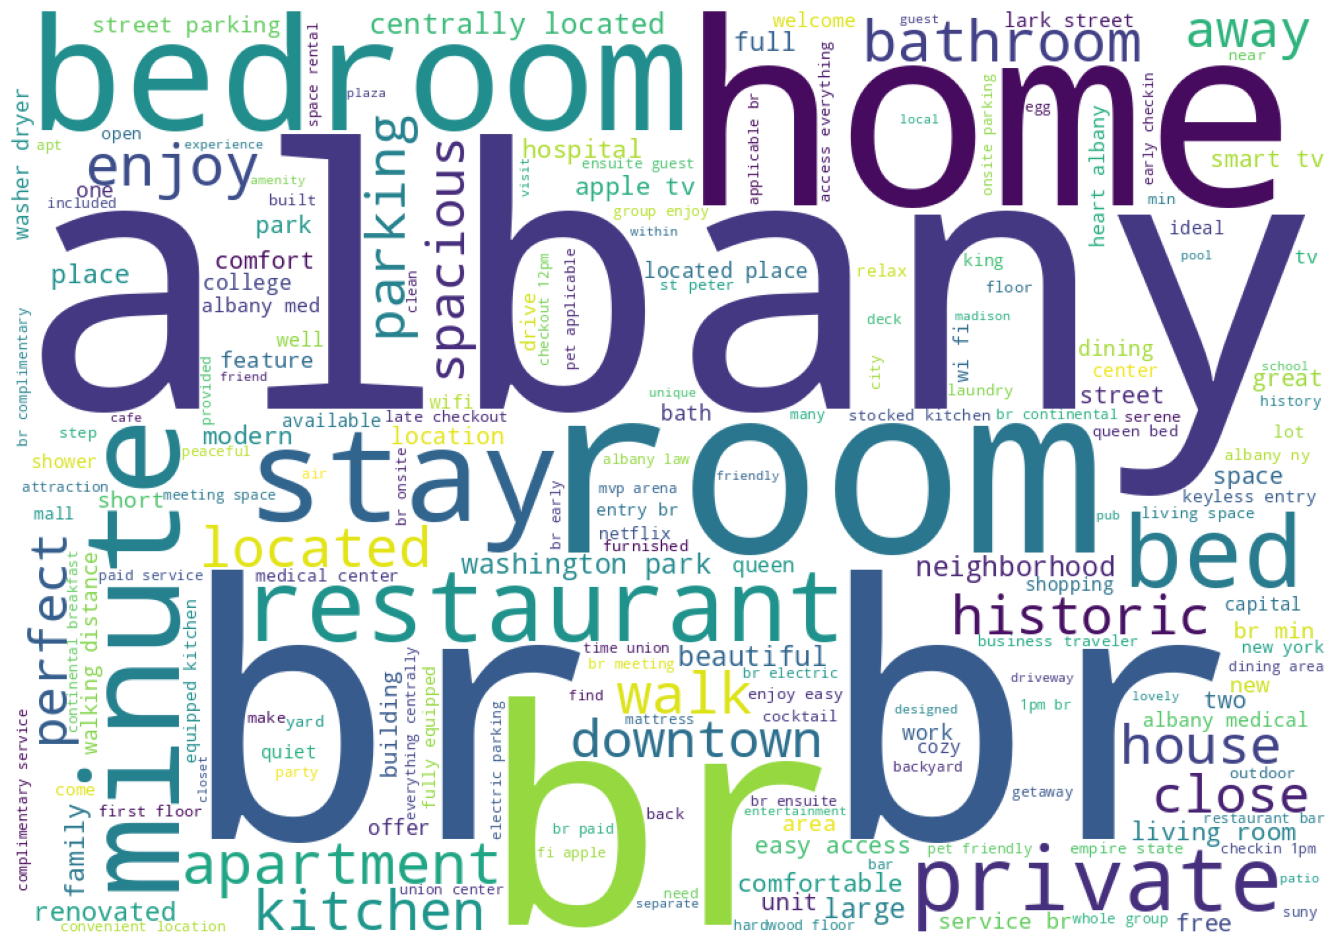

In [11]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 1000, height = 700, background_color="white").generate(final_words)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

The word cloud highlights the most frequent terms used in Airbnb listing descriptions for Albany. Words like “Albany,” “home,” “room,” “bedroom,” “private,” and “restaurant” appear prominently, indicating that hosts emphasize comfort, location, and convenience in their property descriptions.

In [12]:
#creating a dataframe of the summaries of the 100 most cheapest listings
summaryLowDF = listingDF[['description','price']]
summaryLowDF = summaryLowDF[pd.notnull(summaryLowDF['description'])]
summaryLowDF = summaryLowDF[summaryLowDF['description']!=0]
summarLowyDF = summaryLowDF.sort_values('price',ascending=[1])
bot100DF = summaryLowDF.head(100)
bot100DF.sample(n=5)

,description,price
9,Cute single family bungalow (1200sqft) in a co...,214.0
89,My home is in the heart of Pine Hills! It is a...,100.0
60,The room is large with Western exposure giving...,55.0
70,Quiet inviting space in a city neighborhood wi...,55.0
64,"Located in the heart of Albany's ""Warehouse Di...",274.0


In [13]:
#Some data cleaning

words=''
for index,row in bot100DF.iterrows():
    words += row['description']

string_punctuation = string.punctuation
ignoreChar=['\r','\n','',' ',"'s"]
nums=['0','1','2','3','4','5','6','7','8','9']
summary_data=nltk.word_tokenize(words)
words_only = [l.lower() for l in summary_data if l not in string_punctuation if l not in ignoreChar if l not in nums]
filtered_data=[word for word in words_only if word not in stopwords.words('english')]
wnl = nltk.WordNetLemmatizer()
final_data=[wnl.lemmatize(data) for data in filtered_data]
final_words=' '.join(final_data)
final_words[:50]

'apartment located quiet neighborhood fully furnish'

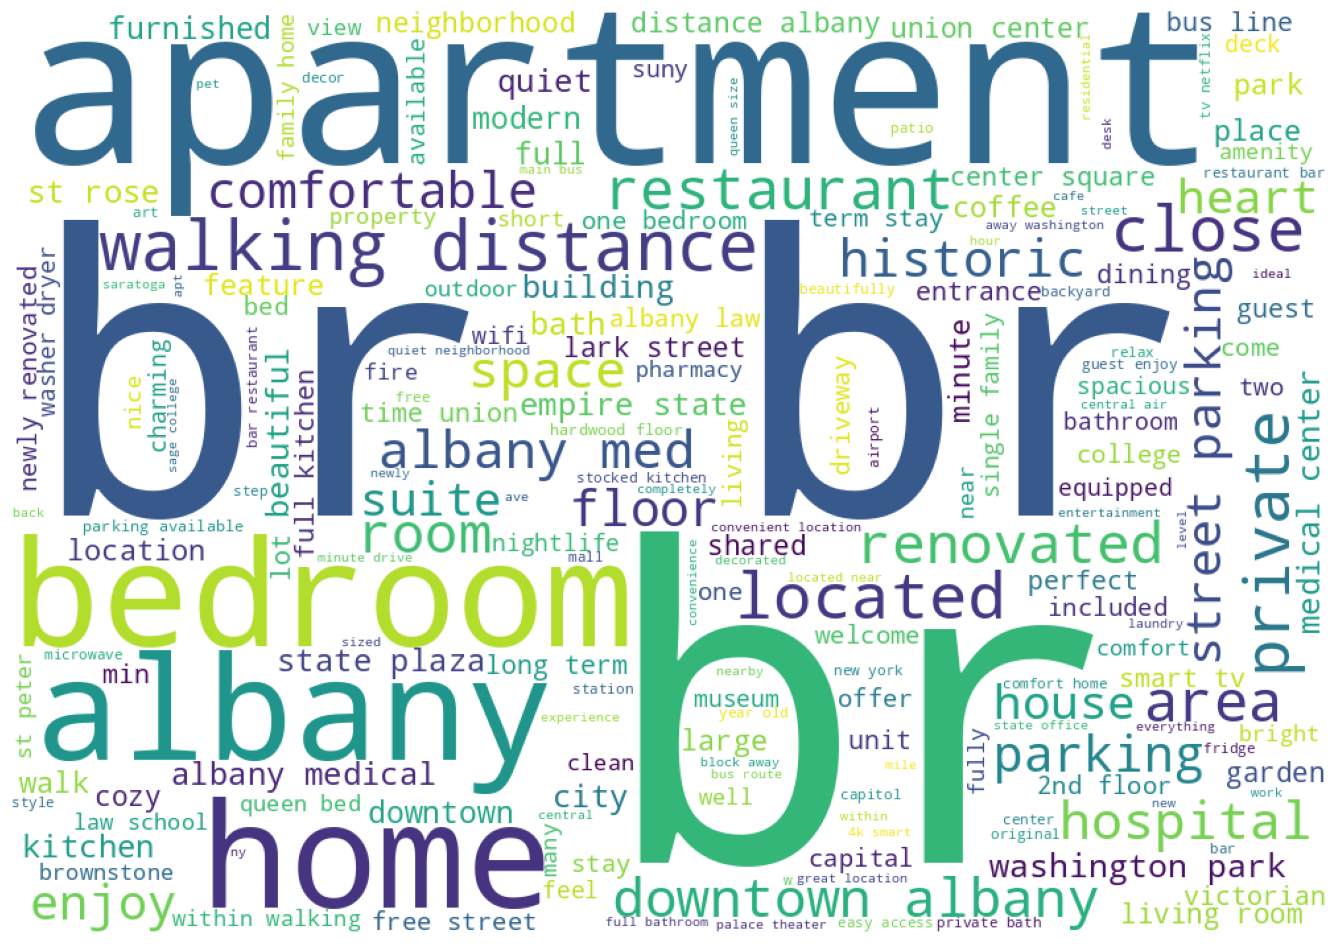

In [14]:
wordcloud = WordCloud(width = 1000, height = 700, background_color="white").generate(final_words)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

The word cloud for the lowest-priced listings in Albany emphasizes terms such as “apartment,” “Albany,” “bedroom,” “private,” and “walking distance.” These listings tend to highlight affordability, accessibility, and proximity to downtown or hospitals, focusing more on basic comfort and convenient location than luxury amenities.

# Analyzing if review sentiment has any relation with price?

In [3]:
#loading review.csv
reviewsDF = pd.read_csv("/content/drive/MyDrive/Airbnb/data/reviews.csv")
reviewsDF = reviewsDF.dropna()
reviewsDF.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2992450,15066586,2014-07-01,16827297,Kristen,Large apartment; nice kitchen and bathroom. Ke...
1,2992450,21810844,2014-10-24,22648856,Christopher,"This may be a little late, but just to say Ken..."
2,2992450,27434334,2015-03-04,45406,Altay,The apartment was very clean and convenient to...
3,2992450,28524578,2015-03-25,5485362,John,Kenneth was ready when I got there and arrange...
4,2992450,35913434,2015-06-23,15772025,Jennifer,We were pleased to see how 2nd Street and the ...


We will use the built-in analyzer in the NLTK Python library to assign a polarity score to each comment to retrieve the 'sentiment' of comments - 'positive','negative' or 'neutral

In [5]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

#Initialize new columns
reviewsDF['polarity_value'] = "Default"
reviewsDF['neg'] = 0.0
reviewsDF['pos'] = 0.0
reviewsDF['neu'] = 0.0
reviewsDF['compound'] = 0.0

#Compute sentiment scores
for index, row in reviewsDF.iterrows():
    ss = sid.polarity_scores(str(row['comments']))  #convert to string to avoid NoneType errors
    reviewsDF.at[index, 'polarity_value'] = ss
    reviewsDF.at[index, 'neg'] = ss['neg']
    reviewsDF.at[index, 'pos'] = ss['pos']
    reviewsDF.at[index, 'neu'] = ss['neu']
    reviewsDF.at[index, 'compound'] = ss['compound']

reviewsDF.head()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,listing_id,id,date,reviewer_id,reviewer_name,comments,polarity_value,neg,pos,neu,compound
0,2992450,15066586,2014-07-01,16827297,Kristen,Large apartment; nice kitchen and bathroom. Ke...,"{'neg': 0.029, 'neu': 0.835, 'pos': 0.136, 'co...",0.029,0.136,0.835,0.7094
1,2992450,21810844,2014-10-24,22648856,Christopher,"This may be a little late, but just to say Ken...","{'neg': 0.0, 'neu': 0.858, 'pos': 0.142, 'comp...",0.000,0.142,0.858,0.9331
2,2992450,27434334,2015-03-04,45406,Altay,The apartment was very clean and convenient to...,"{'neg': 0.0, 'neu': 0.742, 'pos': 0.258, 'comp...",0.000,0.258,0.742,0.8883
3,2992450,28524578,2015-03-25,5485362,John,Kenneth was ready when I got there and arrange...,"{'neg': 0.024, 'neu': 0.802, 'pos': 0.174, 'co...",0.024,0.174,0.802,0.9906
4,2992450,35913434,2015-06-23,15772025,Jennifer,We were pleased to see how 2nd Street and the ...,"{'neg': 0.047, 'neu': 0.764, 'pos': 0.189, 'co...",0.047,0.189,0.764,0.9883


In [7]:
#The polarity scores of each review for each listing is exported to the polarity_reviews.csv file. You can view the attached polarity_reviews.csv file.
reviewsDF.to_csv('polarity_reviews.csv')

In [12]:
from langdetect import detect

def detect_lang(sente):
    sente = str(sente)
    try:
        return detect(sente)
    except:
        return "None"

#Create a new 'language' column by detecting language for each comment
reviewsDF['language'] = reviewsDF['comments'].apply(detect_lang)

#Keep only English reviews
EngReviewsDF = reviewsDF[reviewsDF['language'] == 'en']

EngReviewsDF.head(2)


,listing_id,id,date,reviewer_id,reviewer_name,comments,polarity_value,neg,pos,neu,compound,language
0,2992450,15066586,2014-07-01,16827297,Kristen,Large apartment; nice kitchen and bathroom. Ke...,"{'neg': 0.029, 'neu': 0.835, 'pos': 0.136, 'co...",0.029,0.136,0.835,0.7094,en
1,2992450,21810844,2014-10-24,22648856,Christopher,"This may be a little late, but just to say Ken...","{'neg': 0.0, 'neu': 0.858, 'pos': 0.142, 'comp...",0.000,0.142,0.858,0.9331,en


Number of comments with positive sentiment

In [14]:
#Bin positive scores into deciles [0.0, 0.1, ..., 1.0)
bins = np.linspace(0, 1, 11)  # 0.0 to 1.0 inclusive
cats = pd.cut(EngReviewsDF['pos'], bins=bins, include_lowest=True, right=False)

polarDF = (
    pd.DataFrame({'range_i': cats})
      .groupby('range_i', observed=True)
      .size()
      .reset_index(name='count_of_Comments')
)

#Use the left edge of each interval as the numeric range value
polarDF['RANGE'] = polarDF['range_i'].apply(lambda iv: round(iv.left, 1))
polarDF['Sentiment'] = 'positive'
polarDF = polarDF.drop(columns='range_i')

polarDF.head()

,count_of_Comments,RANGE,Sentiment
0,1010,0.0,positive
1,2637,0.1,positive
2,5162,0.2,positive
3,5390,0.3,positive
4,3995,0.4,positive


Number of comments with negative sentiment

In [26]:
# --- Bin negative sentiment scores into 0.0–1.0 range ---
bins = np.linspace(0, 1, 11)
cats_neg = pd.cut(EngReviewsDF["neg"], bins=bins, include_lowest=True, right=False)

# --- Group and count ---
polarDFneg = (
    pd.DataFrame({'range_i': cats_neg})
      .groupby('range_i', observed=True)
      .size()
      .reset_index(name='count_of_Comments')
)

# --- Extract left boundary (numeric start of bin) ---
polarDFneg["RANGE"] = polarDFneg["range_i"].apply(lambda x: round(x.left, 1))
polarDFneg["Sentiment"] = "negative"

# --- Drop temporary column ---
polarDFneg = polarDFneg.drop(columns="range_i")

polarDFneg.head()

,count_of_Comments,RANGE,Sentiment
0,22982,0.0,negative
1,589,0.1,negative
2,75,0.2,negative
3,26,0.3,negative
4,11,0.4,negative


In [27]:
# --- Bin neutral sentiment scores into 0.0–1.0 range ---
bins = np.linspace(0, 1, 11)
cats_neu = pd.cut(EngReviewsDF["neu"], bins=bins, include_lowest=True, right=False)

# --- Group and count ---
polarDFnut = (
    pd.DataFrame({'range_i': cats_neu})
      .groupby('range_i', observed=True)
      .size()
      .reset_index(name='count_of_Comments')
)

# --- Extract left boundary (numeric start of bin) ---
polarDFnut["RANGE"] = polarDFnut["range_i"].apply(lambda x: round(x.left, 1))
polarDFnut["Sentiment"] = "neutral"

# --- Drop temporary column ---
polarDFnut = polarDFnut.drop(columns="range_i")

polarDFnut.head()

,count_of_Comments,RANGE,Sentiment
0,71,0.0,neutral
1,542,0.1,neutral
2,817,0.2,neutral
3,1478,0.3,neutral
4,2714,0.4,neutral


/tmp/ipython-input-707939401.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.catplot(


<Figure size 1000x1000 with 0 Axes>

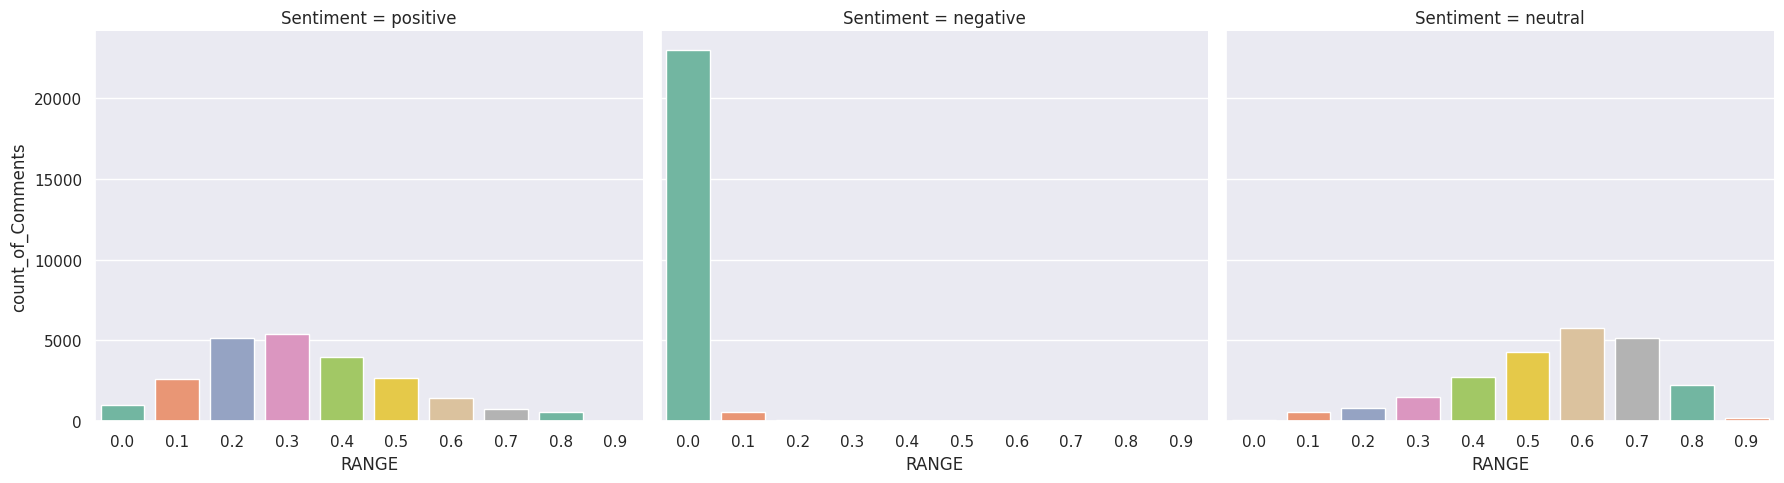

In [20]:
import seaborn as sb
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

#Use catplot instead of factorplot
sb.catplot(
    data=polarDF,
    x="RANGE",
    y="count_of_Comments",
    col="Sentiment",
    kind="bar",
    height=5,
    aspect=1.2,
    palette="Set2"
)

plt.show()


The sentiment distribution shows that positive reviews dominate, with most scores between 0.2 and 0.5, reflecting guests’ overall satisfaction. Negative sentiments are rare, concentrated near 0.0, while neutral comments have moderate representation, mostly in the 0.4–0.7 range—indicating balanced or factual feedback.

# Analyzing if number of reviews a listing affects its price.

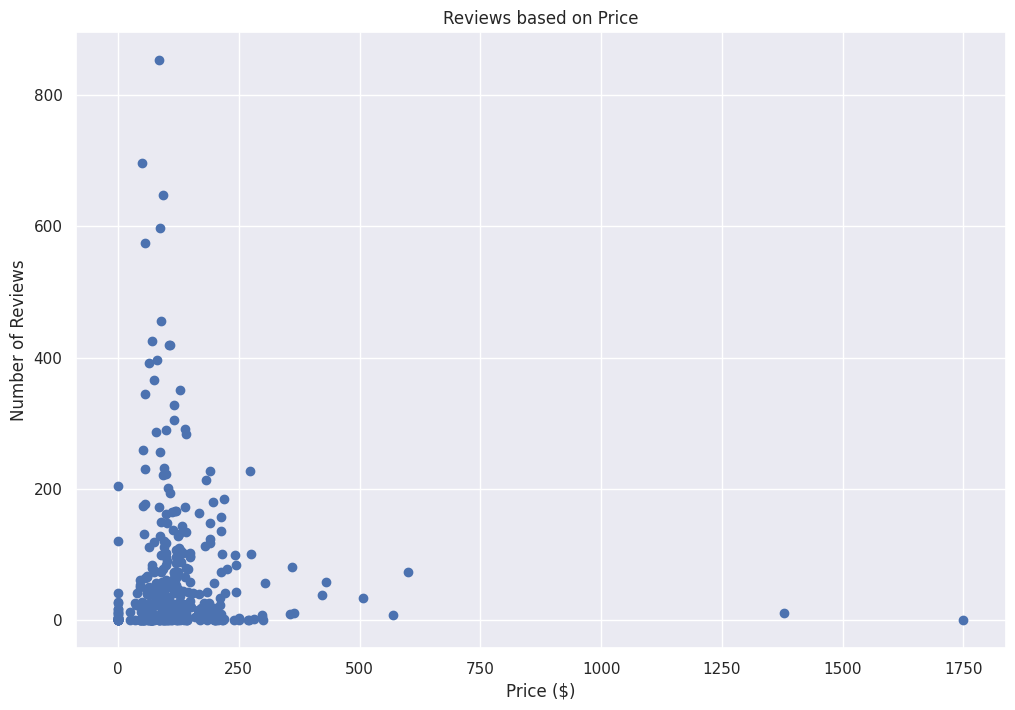

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

#Load and subset columns
inputDF = pd.read_csv('/content/drive/MyDrive/Airbnb/data/listings.csv')
inputDF = inputDF[['number_of_reviews', 'price', 'review_scores_rating']]

#Replace NaN with 0
inputDF.fillna(0, inplace=True)

#Clean and convert price column to float
def clean_price(p):
    try:
        if isinstance(p, str):
            return float(p.replace('$', '').replace(',', '').strip())
        else:
            return float(p)
    except:
        return 0.0

inputDF['price'] = inputDF['price'].apply(clean_price)

#Scatter plot: Number of reviews vs Price
price_review = inputDF[['number_of_reviews', 'price']].sort_values(by='price')

price_review.plot(
    x='price',
    y='number_of_reviews',
    style='o',
    figsize=(12,8),
    legend=False,
    title='Reviews based on Price'
)

plt.xlabel("Price ($)")
plt.ylabel("Number of Reviews")
plt.show()


The scatter plot reveals a negative correlation between price and the number of reviews — lower-priced listings tend to receive significantly more reviews, while high-priced listings are less frequently reviewed. This suggests that affordable accommodations attract more guests and engagement on Airbnb.

<Axes: >

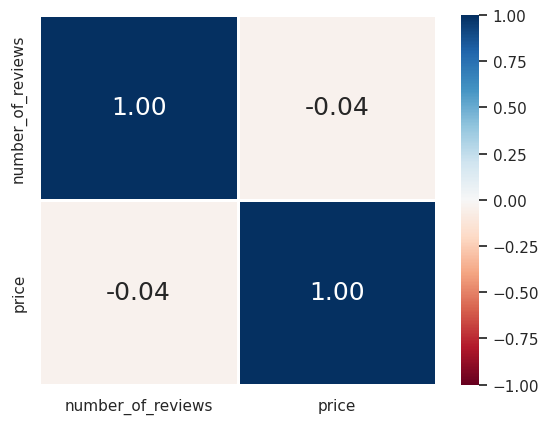

In [29]:

sb.heatmap(price_review.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

The heatmap shows a very weak negative correlation (-0.04) between price and number of reviews, confirming that higher-priced listings tend to receive fewer reviews. This supports earlier findings from the scatter plot — suggesting that affordable listings attract more guest activity on Airbnb.

Summary — Does textual data in the summary and sentiments of reviews affect price?

1. WordCloud Analysis (Top 100 Listings):
High-priced listings emphasize words such as “home,” “private,” “restaurant,” “spacious,” and “Albany”, highlighting comfort, exclusivity, and premium location — features that likely drive higher prices.

2. WordCloud Analysis (Bottom 100 Listings):
Lower-priced listings use terms like “apartment,” “walking distance,” “hospital,” and “downtown”, focusing on convenience and affordability rather than luxury or amenities.

3. Sentiment Distribution:
Most reviews show strongly positive sentiments, with few negative comments. Neutral reviews appear mainly in the 0.4–0.7 range, reflecting descriptive or factual feedback.

4. Price vs Reviews Correlation:
There is a very weak negative correlation (-0.04) between price and number of reviews — lower-priced listings receive more guest engagement, while higher-priced ones attract fewer but likely more satisfied guests.